In [32]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_face_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : FFHQ Face, Test : FFHQ Face', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [ ]:
import pickle 
with open('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_face_gender_stats.pickle', 'rb') as f:
    data = pickle.load(f)
models = data['models']
stats = data['stats']
print(stats)

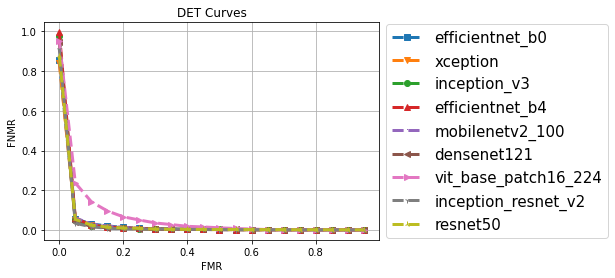

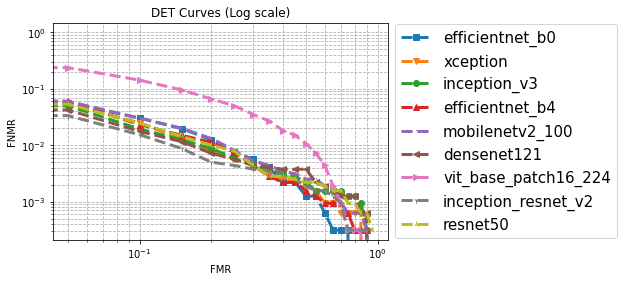

In [31]:
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
STYLES = ['s--', 'v--', 'o--', '^--', ',--', '<--', '>--', '1--', '2--',
        '3--', '4--', '.--', 'p--', '*--', 'h--', 'H--', '+--', 'x--',
        'd--', '|--', '---']
def plt_det_curve(stats, ids, line_width=3, lgf_size=15, save_plots=True,
                dpi=None, save_path='', ext='.png', resampling=True):
    det_fig = plt.figure()
    det_lg_fig = plt.figure()

    det_plot = det_fig.add_subplot(111)
    det_plot.set_title('DET Curves')
    det_plot.set_ylabel('FNMR')
    det_plot.set_xlabel('FMR')
    det_plot.grid(True)

    det_lg_plot = det_lg_fig.add_subplot(111)
    det_lg_plot.set_title('DET Curves (Log scale)')
    det_lg_plot.set_ylabel('FNMR')
    det_lg_plot.set_xlabel('FMR')
    det_lg_plot.set_yscale('log')
    det_lg_plot.set_xscale('log')
    det_lg_plot.grid(True, which='both', ls='--')

    for i, st in enumerate(stats):

        if resampling:
            x = np.arange(0, 1, 0.05)
            y = np.interp(x, st.fmr[::-1], st.fnmr[::-1])
        else:
            x = st.fmr
            y = st.fnmr

        # Plotting DET Curve
        det_plot.plot(
            x, y,
            STYLES[i],
            label=ids[i],
            linewidth=line_width,
            pickradius=0.5
        )
        det_lg_plot.plot(
            x, y,
            STYLES[i],
            label=ids[i],
            linewidth=line_width,
            pickradius=0.5
        )

    # Finalizing plots
    det_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))
    det_lg_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))

    # Showing plots or saving plots
    if save_plots:
        # saving plots
        det_fig.savefig(join(save_path, 'DET' + ext), dpi=dpi)
        det_lg_fig.savefig(join(save_path, 'DET (Log)' + ext), dpi=dpi)
        plt.close('all')
    else:
        plt.show()


def plt_error_curves(stats, ids, line_width=3, lgf_size=15, save_plots=True,
                    dpi=None, save_path='', ext='.png'):
    for i, st in enumerate(stats):
        # Plotting FMR and FNMR curves
        eer_fig = plt.figure()
        eer_plot = eer_fig.add_subplot(111)
        eer_plot.grid(True)
        eer_plot.set_ylabel('Error')
        eer_plot.set_xlabel('Matching Scores')
        eer_plot.set_title('FMR and FNMR Curves')
        eer_plot.set_yscale('log')
        eer_plot.plot(st.thrs, st.fmr, linewidth=line_width,
                    label=ids[i] + ' (FMR)')
        eer_plot.plot(st.thrs, st.fnmr, linewidth=line_width,
                    label=ids[i] + ' (FNMR)')
        eer_plot.legend(loc='center left', prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 0.5))

        if save_plots:
            fname = 'FMR and FNMR curves (%s)' % ids[i] + ext
            eer_fig.savefig(join(save_path, fname), dpi=dpi)
            plt.close('all')
        else:
            plt.show()
# plt_error_curves(stats=stats, ids=models, save_plots=False)
plt_det_curve(stats, models, line_width=3, lgf_size=15, save_plots=False,
                dpi=None, save_path='', ext='.png', resampling=True)

In [33]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_ocular_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : FFHQ Ocular, Test : FFHQ Ocular', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [32]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_gender_unab.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : NDIris, Test : UNAB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [33]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_gender_visa_iris.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : NDIris, Test : VISA Iris', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [34]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ndiris_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : NDIris, Test : NDIris', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [35]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_nir_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : Notredame Face NIR, Test : Notredame Face NIR', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [36]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_rgb_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : Notredame Face RGB, Test : Notredame Face RGB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [37]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : Notredame Ocular NIR, Test : Notredame Ocular NIR', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [38]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_rgb_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : Notredame Ocular RGB, Test : Notredame Ocular RGB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [39]:
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ufpr_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : UFPR, Test : UFPR', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [2]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_model_visob_gender.csv',)
fig = px.bar(df, x='Model', y=['Male Acc', 'Female Acc', 'Avg Acc', 'MCC'], title='Train : VISOB, Test : VISOB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=800, height=400)
fig.show()

In [11]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_race_visob_gender.csv')

df.head()

fig = px.bar(df, x='Model', y=df.columns[2:], title='Train : VISOB, Test : VISOB', barmode='group', labels={'value': 'Accuracy', 'variable': 'Race-Gender'},width=1000, height=500)
fig.show()

In [12]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/home/sreeraj/Documents/nfs_final/final_eval/results/across_race_visob_syn_gender.csv')

df.head()

fig = px.bar(df, x='Model', y=df.columns[2:], title='Train : VISOB Synthetic, Test : VISOB', barmode='group', labels={'value': 'Accuracy', 'variable': 'Race-Gender'},width=1000, height=500)
fig.show()

In [10]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_age_ufpr_gender.csv')

df.head()

fig = px.bar(df, x='Model', y=df.columns[2:], title='Train : UFPR, Test : UFPR', barmode='group', labels={'value': 'Accuracy', 'variable': 'Age-Gender'},width=1000, height=500)
fig.show()

In [17]:
import pandas as pd
from copy import deepcopy
df_f = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_face_gender.csv')
df_o = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_ffhq_ocular_gender.csv')
df_f['Modal'] = 'Face'
df_o['Modal'] = 'Ocular'

df = pd.concat([df_f, df_o])
df.head()


df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : FFHQ, Test : FFHQ', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Modal')
fig.show()


In [18]:
import pandas as pd
from copy import deepcopy
df_f = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_rgb_gender.csv')
df_o = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_rgb_gender.csv')
df_f['Modal'] = 'Face'
df_o['Modal'] = 'Ocular'

df = pd.concat([df_f, df_o])
df.head()


df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : Notredame VIS, Test : Notredame VIS', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Modal')
fig.show()


In [19]:
import pandas as pd
from copy import deepcopy
df_f = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_nir_gender.csv')
df_o = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_gender.csv')
df_f['Modal'] = 'Face'
df_o['Modal'] = 'Ocular'

df = pd.concat([df_f, df_o])
df.head()


df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : Notredame NIR, Test : Notredame NIR', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Modal')
fig.show()


In [25]:
import pandas as pd
from copy import deepcopy
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_device_visob_gender.csv')
df['Device'] = df.Model.apply(lambda x: x.split('_')[-1])
df.Model = df.Model.apply(lambda x: '_'.join(x.split('_')[:-1]))

df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : VISOB, Test : VISOB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Device')
fig.show()


In [27]:
import pandas as pd
from copy import deepcopy
df = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_lighting_visob_gender.csv')
df['Lighting'] = df.Model.apply(lambda x: x.split('_')[-1])
df.Model = df.Model.apply(lambda x: '_'.join(x.split('_')[:-1]))

df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : VISOB, Test : VISOB', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Lighting')
fig.show()


In [30]:
import pandas as pd
from copy import deepcopy
df_n = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_nir_gender.csv')
df_v = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_ocular_rgb_gender.csv')
df_n['Spectrum'] = 'NIR'
df_v['Spectrum'] = 'VIS'

df = pd.concat([df_n, df_v])
df.head()


df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : Notredame Ocular, Test : Notredame Ocular', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Spectrum')
fig.show()


In [31]:
import pandas as pd
from copy import deepcopy
df_n = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_nir_gender.csv')
df_v = pd.read_csv('/home/sreeraj/lab/nsf/final_eval/results/across_model_notredame_face_rgb_gender.csv')
df_n['Spectrum'] = 'NIR'
df_v['Spectrum'] = 'VIS'

df = pd.concat([df_n, df_v])
df.head()


df_macc = deepcopy(df)
df_macc['Value'] = df_macc['Male Acc']
df_macc['Metric'] = 'Male Acc'

df_facc = deepcopy(df)
df_facc['Value'] = df_facc['Female Acc']
df_facc['Metric'] = 'Female Acc'

df_oacc = deepcopy(df)
df_oacc['Value'] = df_facc['Avg Acc']
df_oacc['Metric'] = 'Avg Acc'

df_mcc = deepcopy(df)
df_mcc['Value'] = df_facc['MCC']
df_mcc['Metric'] = 'MCC'

df = pd.concat([df_macc, df_facc, df_oacc, df_mcc])
df.head()
fig = px.bar(df, x='Model', y='Value', title='Train : Notredame Face, Test : Notredame Face', barmode='group', labels={'value': 'Acc/MCC', 'variable': 'Metrics'},width=1000, height=400, facet_col='Metric', color='Spectrum')
fig.show()
